# Taming Text

In this homework we will explore a relatively large corpus of emails released in public during the Hillary Clinton email controversy.

In [2]:
#A few dependecies are needed:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Loading the data:

In [3]:
data_dir = 'hillary-clinton-emails/'
filename = 'Emails.csv'
df = pd.read_csv(data_dir + filename)

In [4]:
df.head()

Id  DocNumber                                    MetadataSubject  \
0   1  C05739545                                                WOW   
1   2  C05739546  H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...   
2   3  C05739547                                      CHRIS STEVENS   
3   4  C05739550                         CAIRO CONDEMNATION - FINAL   
4   5  C05739554  H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...   

     MetadataTo       MetadataFrom  SenderPersonId           MetadataDateSent  \
0             H  Sullivan, Jacob J            87.0  2012-09-12T04:00:00+00:00   
1             H                NaN             NaN  2011-03-03T05:00:00+00:00   
2            ;H    Mills, Cheryl D            32.0  2012-09-12T04:00:00+00:00   
3             H    Mills, Cheryl D            32.0  2012-09-12T04:00:00+00:00   
4  Abedin, Huma                  H            80.0  2011-03-11T05:00:00+00:00   

        MetadataDateReleased  \
0  2015-05-22T04:00:00+00:00   
1  2015-05-22T04:00:00+00:00   
2  2015-05-22T04:00:00+00:00   
3  2015-05-22T04:00:00+00:00   
4  2015-05-22T04:00:00+00:00   

                                     MetadataPdfLink MetadataCaseNumber  \
0  DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...       F-2015-04841   
1  DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...       F-2015-04841   
2  DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...       F-2015-04841   
3  DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...       F-2015-04841   
4  DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...       F-2015-04841   

                         ...                         ExtractedTo  \
0                        ...                                 NaN   
1                        ...                                 NaN   
2                        ...                                  B6   
3                        ...                                 NaN   
4                        ...                                 NaN   

                              ExtractedFrom         ExtractedCc  \
0  Sullivan, Jacob J <Sullivan11@state.gov>                 NaN   
1                                       NaN                 NaN   
2       Mills, Cheryl D <MillsCD@state.gov>        Abedin, Huma   
3       Mills, Cheryl D <MillsCD@state.gov>  Mitchell, Andrew B   
4                                       NaN                 NaN   

                        ExtractedDateSent ExtractedCaseNumber  \
0  Wednesday, September 12, 2012 10:16 AM        F-2015-04841   
1                                     NaN        F-2015-04841   
2  Wednesday, September 12, 2012 11:52 AM        F-2015-04841   
3   Wednesday, September 12,2012 12:44 PM        F-2015-04841   
4                                     NaN        F-2015-04841   

  ExtractedDocNumber ExtractedDateReleased ExtractedReleaseInPartOrFull  \
0          C05739545            05/13/2015              RELEASE IN FULL   
1          C05739546            05/13/2015              RELEASE IN PART   
2          C05739547            05/14/2015              RELEASE IN PART   
3          C05739550            05/13/2015              RELEASE IN PART   
4          C05739554            05/13/2015              RELEASE IN PART   

                                   ExtractedBodyText  \
0                                                NaN   
1  B6\r\nThursday, March 3, 2011 9:45 PM\r\nH: La...   
2                                                Thx   
3                                                NaN   
4  H <hrod17@clintonemail.com>\r\nFriday, March 1...   

                                             RawText  
0  UNCLASSIFIED\r\nU.S. Department of State\r\nCa...  
1  UNCLASSIFIED\r\nU.S. Department of State\r\nCa...  
2  UNCLASSIFIED\r\nU.S. Department of State\r\nCa...  
3  UNCLASSIFIED\r\nU.S. Department of State\r\nCa...  
4  B6\r\nUNCLASSIFIED\r\nU.S. Department of State...  

[5 rows x 22 columns]

In [5]:
df.shape

(7945, 22)

In [4]:
df.columns

Index(['Id', 'DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')

## Assignment 1 - Word Cloud

In [11]:
from wordcloud import WordCloud
import nltk

### 1.1 First Cloud - WordCloud Library

To create our word cloud we will consider both the 'Extracted Body' and the 'Extracted Subject'. We join these into long strings of words as the structure is not critical to word counting.

In [25]:
# Get the row text and put it into lists
body = df.dropna(subset=['ExtractedBodyText'],axis=0).ExtractedBodyText.astype('str').tolist()
subject = df.dropna(subset=['ExtractedSubject'],axis=0).ExtractedSubject.astype('str').tolist()

In [28]:
#Maybe we wanna do some preprocessing here to get only the body of the email.

#  ??


In [29]:
# Collapse into a long string
long_string_body = ' '.join(body)
long_string_subject = ' '.join(subject)
all_together = long_string_subject + ' ' + long_string_body

(-0.5, 399.5, 199.5, -0.5)

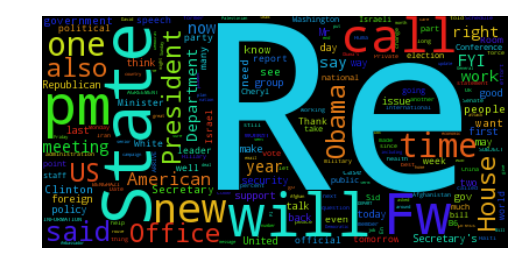

In [30]:
# Generate a word cloud image
wordcloud = WordCloud().generate(all_together)
plt.imshow(wordcloud)
plt.axis("off")

### 1.2 Second Cloud - Pre-processing pipeline & NLTK

Now we implement our text pre-processing pipeline:

In [ ]:
#Donwload nltk if not done yet:
# nltk.download()

In [15]:
#Tokenization
tokens = nltk.word_tokenize(all_together)

In [36]:
#Stopword removal
from nltk.corpus import stopwords
Stop = set(stopwords.words('english'))
extraStop = set(('re','fw','pm','am',"n't"))
finalStop = Stop.union(extraStop)

new_tokens = list()
for token in tokens:
    if token.lower() not in finalStop:
        new_tokens.append(token.lower())

In [37]:
#Term normalization

# ?

In [38]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemanized = [lemmatizer.lemmatize(token) for token in new_tokens]

In [39]:
#stemming
stemmer = nltk.SnowballStemmer("english")
stemmed = [stemmer.stem(lema) for lema in lemanized]

In [40]:
all_together2 = ' '.join(stemmed)

(-0.5, 399.5, 199.5, -0.5)

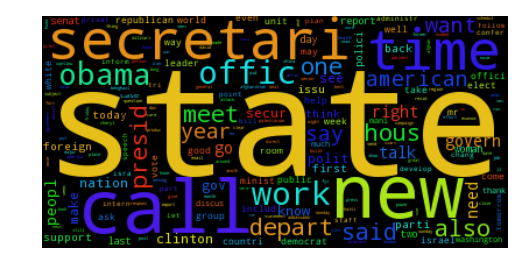

In [41]:
# Generate a word cloud image
wordcloud = WordCloud().generate(all_together2)
plt.imshow(wordcloud)
plt.axis("off")

## Assignment 2 - Sentiment by Country

We loop across all the emails and inside across all the countries. If a match if found, sentiment analysis is computed with NLTK and it is added to a dataframe that keeps track of the cummulative result.

In [6]:
import pycountry
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [7]:
# Inspiration from:
# https://www.kaggle.com/operdeck/d/kaggle/hillary-clinton-emails/hillary-s-sentiment-about-countries

In [48]:
#Creating the DataFrame
df_countries = pd.DataFrame([i.name for i in pycountry.countries],columns=['Country']).set_index('Country')
df_countries['Cummulative_Sentiment'] = 0
df_countries.head()

Cummulative_Sentiment
Country                             
Aruba                              0
Afghanistan                        0
Angola                             0
Anguilla                           0
Åland Islands                      0

In [21]:
for country in pycountry.countries:
    print(country.name.lower())

aruba
afghanistan
angola
anguilla
åland islands
albania
andorra
united arab emirates
argentina
armenia
american samoa
antarctica
french southern territories
antigua and barbuda
australia
austria
azerbaijan
burundi
belgium
benin
bonaire, sint eustatius and saba
burkina faso
bangladesh
bulgaria
bahrain
bahamas
bosnia and herzegovina
saint barthélemy
belarus
belize
bermuda
bolivia, plurinational state of
brazil
barbados
brunei darussalam
bhutan
bouvet island
botswana
central african republic
canada
cocos (keeling) islands
switzerland
chile
china
côte d'ivoire
cameroon
congo, the democratic republic of the
congo
cook islands
colombia
comoros
cabo verde
costa rica
cuba
curaçao
christmas island
cayman islands
cyprus
czechia
germany
djibouti
dominica
denmark
dominican republic
algeria
ecuador
egypt
eritrea
western sahara
spain
estonia
ethiopia
finland
fiji
falkland islands (malvinas)
france
faroe islands
micronesia, federated states of
gabon
united kingdom
georgia
guernsey
ghana
gibraltar
gui

In [49]:
#Superloop incoming.. taking waaaaay too long. And it hasnt worked
extras = ['syria','Syria']

def update_feeling(email,df_countries):
    scompound = sid.polarity_scores(email)['compound']
    sc_old = df_countries.ix[country.name, 'Cummulative_Sentiment']
    sc_new = sc_old + scompound
    print(sc_new)
    df_countries = df_countries.set_value(country.name, 'Cummulative_Sentiment', sc_new)
    return df_countries
            
for email in body[0:10]:
    for country in pycountry.countries:
        if country.name in email:
            df_countries = update_feeling(email,df_countries)
        elif country.name.lower() in email:
            df_countries = update_feeling(email,df_countries)
        elif country.name.split(',',1)[0] in email:
            df_countries = update_feeling(email,df_countries)
        elif country.name.lower().split(',',1)[0] in email:
            df_countries = update_feeling(email,df_countries)
        elif country.alpha_2 in email:
            df_countries = update_feeling(email,df_countries)
            
    for extra in extras:
        if extra in email:
            df_countries = update_feeling(email,df_countries)
            break
            
            
df_countries.head()

0.0
0.0
0.0
0.0
0.0
0.0
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
-0.8402
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


Cummulative_Sentiment
Country                             
Aruba                              0
Afghanistan                        0
Angola                             0
Anguilla                           0
Åland Islands                      0

In [50]:
import pickle
with open('sentiment_by_country.pickle', 'wb') as handle:
  pickle.dump(df_countries, handle)

In [53]:
interesting_countries = df_countries.query('Cummulative_Sentiment<0')
interesting_countries.head()

Empty DataFrame
Columns: [Cummulative_Sentiment]
Index: []

### 2.1 Viz by Country

## Assignment 3 - Topic Modeling

In [37]:
from gensim import models

In [34]:
# Check
# https://www.kaggle.com/forums/f/798/hillary-clinton-s-emails/t/16925/topic-modeling-visualization

In [43]:
# https://radimrehurek.com/gensim/tut1.html#corpus-formats
corpus = [[(1, 0.5)], []]
model = models.LdaModel(corpus, num_topics=10)

## *BONUS!*